<h1>ИУ5-62Б Корчевский Александр</h1>

<h2>РК2. Вариант 11</h2>

Задание. Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы: Метод опорных векторов, Случайный лес. Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [4]:
print('Количество пропущенных значений')
data.isnull().sum()

Количество пропущенных значений


Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

Удалим строки с пропущенными значениями и столбцы, не влияющие на целевой признак

In [5]:
del data['Unnamed: 0']
del data['Name']
del data['Photo']
del data['Flag']
del data['Club Logo']
del data['Loaned From']
del data['Joined']
del data['Contract Valid Until']

In [6]:
data = data.dropna()
data.isnull().sum()

ID                0
Age               0
Nationality       0
Overall           0
Potential         0
                 ..
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
Release Clause    0
Length: 81, dtype: int64

In [7]:
data = data[:500]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 588
Data columns (total 81 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        500 non-null    int64  
 1   Age                       500 non-null    int64  
 2   Nationality               500 non-null    object 
 3   Overall                   500 non-null    int64  
 4   Potential                 500 non-null    int64  
 5   Club                      500 non-null    object 
 6   Value                     500 non-null    object 
 7   Wage                      500 non-null    object 
 8   Special                   500 non-null    int64  
 9   Preferred Foot            500 non-null    object 
 10  International Reputation  500 non-null    float64
 11  Weak Foot                 500 non-null    float64
 12  Skill Moves               500 non-null    float64
 13  Work Rate                 500 non-null    object 
 14  Body Type 

Для решения задачи классификации выполним кодирование категориальных признаков

In [8]:
for col in data.columns:
    print('{} - {}'.format(col, len(data[col].unique())))

ID - 500
Age - 20
Nationality - 60
Overall - 15
Potential - 17
Club - 102
Value - 116
Wage - 130
Special - 315
Preferred Foot - 2
International Reputation - 5
Weak Foot - 4
Skill Moves - 4
Work Rate - 8
Body Type - 8
Real Face - 2
Position - 26
Jersey Number - 40
Height - 15
Weight - 40
LS - 71
ST - 71
RS - 71
LW - 81
LF - 77
CF - 77
RF - 77
RW - 81
LAM - 75
CAM - 75
RAM - 75
LM - 74
LCM - 65
CM - 65
RCM - 65
RM - 74
LWB - 67
LDM - 76
CDM - 76
RDM - 76
RWB - 67
LB - 72
LCB - 93
CB - 93
RCB - 93
RB - 72
Crossing - 65
Finishing - 74
HeadingAccuracy - 61
ShortPassing - 34
Volleys - 71
Dribbling - 52
Curve - 70
FKAccuracy - 74
LongPassing - 51
BallControl - 42
Acceleration - 59
SprintSpeed - 55
Agility - 61
Reactions - 29
Balance - 68
ShotPower - 52
Jumping - 64
Stamina - 43
Strength - 59
LongShots - 73
Aggression - 63
Interceptions - 72
Positioning - 72
Vision - 61
Penalties - 64
Composure - 35
Marking - 77
StandingTackle - 78
SlidingTackle - 80
GKDiving - 18
GKHandling - 17
GKKicking - 1

In [9]:
data.dtypes

ID                  int64
Age                 int64
Nationality        object
Overall             int64
Potential           int64
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 81, dtype: object

In [10]:
def money_to_float(v):
    return float(v[1:-1])
money_cols = ['Value', 'Wage', 'Release Clause']
for mc in money_cols:
    data[mc] = data[mc].map(money_to_float)

def height_to_float(h):
    foot_and_inch = h.split('\'')
    return float(float(foot_and_inch[0]) + float(foot_and_inch[1]) / 12.)
data['Height'] = data['Height'].map(height_to_float)

def weight_to_float(w):
    return float(w[:-3])
data['Weight'] = data['Weight'].map(weight_to_float)

def position_to_float(p):
    nums = p.split('+')
    return float(float(nums[0]) + 0.1 * float(nums[1]))

pos_cols = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
for p in pos_cols:
    data[p] = data[p].map(position_to_float)

data.head()

,ID,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,31,Argentina,94,94,FC Barcelona,110.5,565.0,2202,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
1,20801,33,Portugal,94,94,Juventus,77.0,405.0,2228,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1
2,190871,26,Brazil,92,93,Paris Saint-Germain,118.5,290.0,2143,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1
4,192985,27,Belgium,91,92,Manchester City,102.0,355.0,2281,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4
5,183277,27,Belgium,91,91,Chelsea,93.0,340.0,2142,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172.1


In [11]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type', 'Real Face', 'Position']
le = LabelEncoder()
for c in cols_to_encode:
    data[c] = le.fit_transform(data[c])
data.head()

,ID,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,31,2,94,94,31,110.5,565.0,2202,0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
1,20801,33,42,94,94,47,77.0,405.0,2228,1,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1
2,190871,26,7,92,93,67,118.5,290.0,2143,1,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1
4,192985,27,5,91,92,55,102.0,355.0,2281,1,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4
5,183277,27,5,91,91,21,93.0,340.0,2142,1,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172.1


In [12]:
data.dtypes

ID                  int64
Age                 int64
Nationality         int64
Overall             int64
Potential           int64
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause    float64
Length: 81, dtype: object

Так как выполняется задача небинарной классификации и в тестовой выборке возможен дисбаланс классов, были выбраны следующие метрики:
 - precision
 - recall
 - f1-score

Всем метрикам был задан уровень детализации average='weighted'.

In [13]:
def print_metrics(y_test, y_pred):
    rep = classification_report(y_test, y_pred, output_dict=True)
    print("weighted precision:", rep['weighted avg']['precision'])
    print("weighted recall:", rep['weighted avg']['recall'])
    print("weighted f1-score:", rep['weighted avg']['f1-score'])
    plt.figure(figsize=(4, 3))
    plt.title('Матрица ошибок')
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['International Reputation'], axis=1), data['International Reputation'], test_size=0.5, random_state=17)

SVC. Базовая модель.

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_train.columns)
x_train_scaled.describe()

,ID,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
count,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,...,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02
mean,-2.842171e-16,-2.273737e-16,1.243450e-17,-5.329071e-18,-1.840306e-15,7.105427e-18,2.131628e-17,2.486900e-17,3.694822e-16,5.684342e-17,...,-2.593481e-16,8.171241e-17,1.207923e-16,5.861978e-17,4.973799e-17,6.394885e-17,3.375078e-17,4.973799e-17,-3.641532e-17,-1.953993e-16
std,1.002006e+00,1.002006e+00,1.002006e+00,1.002006e+00,1.002006e+00,1.002006e+00,1.002006e+00,1.002006e+00,1.002006e+00,1.002006e+00,...,1.002006e+00,1.002006e+00,1.002006e+00,1.002006e+00,1.002006e+00,1.002006e+00,1.002006e+00,1.002006e+00,1.002006e+00,1.002006e+00
min,-6.012872e+00,-2.081673e+00,-1.442809e+00,-1.235431e+00,-1.566337e+00,-1.744186e+00,-1.444239e+00,-1.163443e+00,-2.946546e+00,-1.741338e+00,...,-3.439873e+00,-2.166588e+00,-2.119106e+00,-1.928638e+00,-2.275307e+00,-2.426649e+00,-2.184293e+00,-2.209137e+00,-2.161973e+00,-1.418700e+00
25%,-3.981337e-01,-6.743764e-01,-1.109597e+00,-8.824507e-01,-9.587585e-01,-9.381051e-01,-6.154865e-01,-6.908134e-01,-6.096423e-01,5.742710e-01,...,-6.752944e-01,-7.844435e-01,-9.127185e-01,-1.014198e+00,-7.320982e-01,-7.480042e-01,-6.995916e-01,-1.015654e+00,-6.555816e-01,-5.968515e-01
50%,1.264703e-01,-1.114579e-01,-2.765661e-01,-1.764901e-01,-4.739110e-02,1.280022e-01,-3.152140e-01,-2.499038e-01,1.667694e-01,5.742710e-01,...,6.192656e-02,2.905574e-01,4.660103e-01,4.198113e-01,3.950614e-02,-7.654621e-02,-1.057108e-01,-1.205418e-01,-5.302498e-02,-2.867488e-01
75%,5.636768e-01,7.329199e-01,1.084050e+00,5.294704e-01,5.601872e-01,7.520650e-01,2.853309e-01,3.464344e-01,7.112161e-01,5.742710e-01,...,6.148423e-01,8.536531e-01,8.860918e-01,8.978142e-01,8.111105e-01,5.949118e-01,7.851104e-01,7.745706e-01,8.508099e-01,2.853373e-01
max,1.634767e+00,2.421675e+00,1.778242e+00,4.059273e+00,2.990500e+00,1.688159e+00,5.570127e+00,5.992615e+00,2.014821e+00,5.742710e-01,...,3.195116e+00,1.416749e+00,1.284631e+00,1.355034e+00,2.354319e+00,1.937828e+00,2.863693e+00,2.564795e+00,2.959758e+00,5.461608e+00


/home/user/summer21/disc/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/summer21/disc/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/summer21/disc/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


weighted precision: 0.40951981351981354
weighted recall: 0.472
weighted f1-score: 0.4051585430132882


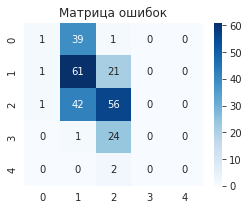

In [16]:
svm_model = SVC()
svm_model.fit(x_train_scaled, y_train)
y_pred_svm = svm_model.predict(x_test_scaled)
print_metrics(y_test, y_pred_svm)

Подбор гиперпараметров

In [17]:
params = {'C': np.concatenate([np.arange(0.1, 2, 0.03), np.arange(2, 20, 1)])}
grid_cv = GridSearchCV(estimator=svm_model, param_grid=params, cv=10, n_jobs=-1, scoring='f1_macro')
grid_cv.fit(x_train_scaled, y_train)
print(grid_cv.best_params_)

/home/user/summer21/disc/venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


{'C': 3.0}


Лучшая модель

weighted precision: 0.527274483378257
weighted recall: 0.516
weighted f1-score: 0.479651325406396


/home/user/summer21/disc/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/summer21/disc/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/summer21/disc/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


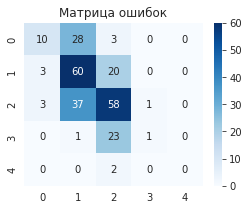

In [18]:
best_svm_model = grid_cv.best_estimator_
best_svm_model.fit(x_train_scaled, y_train)
y_pred_svm = best_svm_model.predict(x_test_scaled)
print_metrics(y_test, y_pred_svm)

RandomForestClassifier. Базовая модель

/home/user/summer21/disc/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/summer21/disc/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/summer21/disc/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


weighted precision: 0.5845401549225389
weighted recall: 0.584
weighted f1-score: 0.5477295317221876


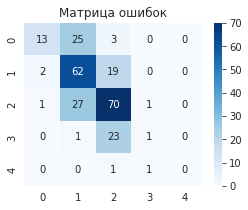

In [19]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)
y_pred_rfc = rfc_model.predict(x_test)
print_metrics(y_test, y_pred_rfc)

Подбор гиперпараметров

In [20]:
params = {'n_estimators': [5, 10, 50, 100], 'max_features': [2, 3, 4], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3, 4, 5]}
grid_cv = GridSearchCV(estimator=rfc_model, param_grid=params, cv=10, n_jobs=-1, scoring='f1_weighted')
grid_cv.fit(x_train, y_train)
print(grid_cv.best_params_)

/home/user/summer21/disc/venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


{'criterion': 'entropy', 'max_features': 3, 'min_samples_leaf': 2, 'n_estimators': 100}


Лучшая модель

/home/user/summer21/disc/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/summer21/disc/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/summer21/disc/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


weighted precision: 0.5586348600508906
weighted recall: 0.568
weighted f1-score: 0.5125000953652489


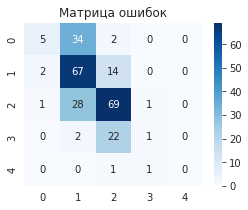

In [21]:
best_rfc_model = grid_cv.best_estimator_
best_rfc_model.fit(x_train, y_train)
y_pred_rfc = best_rfc_model.predict(x_test)
print_metrics(y_test, y_pred_rfc)

Сравнение результатов

Выведем лучшие результаты моделей

SVC result

weighted precision: 0.527274483378257
weighted recall: 0.516
weighted f1-score: 0.479651325406396


/home/user/summer21/disc/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/summer21/disc/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/summer21/disc/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


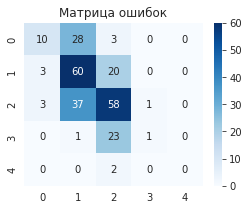

In [22]:
print("SVC result\n")
print_metrics(y_test, y_pred_svm)

RandomForestClassifier result

weighted precision: 0.5586348600508906
weighted recall: 0.568
weighted f1-score: 0.5125000953652489


/home/user/summer21/disc/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/summer21/disc/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/summer21/disc/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


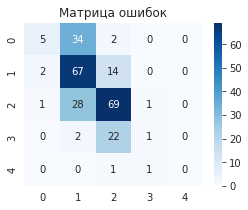

In [23]:
print("RandomForestClassifier result\n")
print_metrics(y_test, y_pred_rfc)

Вывод: для метода случайного леса модель по умолчанию оказалась лучше модели с подобранными параметрами. Эта же модель показала лучшие результаты по сравнению с моделями SVM. Вывод: небинарную классификацию в условии дисбаланса класса лучше всего реализовал метод Случайного леса.